In [1007]:
import warnings
warnings.filterwarnings('ignore')

In [1008]:
import numpy as np
import pandas as pd

In [1009]:
Bike_df=pd.read_csv("/content/day.csv")
Bike_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [1010]:
Bike_df=Bike_df.drop(["casual","registered","dteday","instant"],axis=1)

In [1011]:
Bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [1012]:
Bike_df.shape

(730, 12)

In [1013]:
Bike_df.describe()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,4508.006849
std,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,1936.011647
min,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,22.000000
25%,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,5966.000000
max,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,8714.000000


In [1014]:
Bike_df['season']=Bike_df['season'].map({1:'spring', 2:'summer', 3:'fall', 4:'winter'})
#Bike_df['yr']=Bike_df['yr'].map({1:'2019', 0:'2018'})
Bike_df['weathersit']=Bike_df['weathersit'].map({1:'Clear', 2:'Mist', 3:'Light Snow', 4:'Heavy Rain'})
Bike_df['mnth'] = Bike_df['mnth'].map({1:'Jan',2:'Feb',3:'Mar',4:'April',5:'May',6:'June',7:'July',8:'Aug',9:'Sept',10:'Oct',11:'Nov',12:'Dec'})
Bike_df['weekday'] = Bike_df['weekday'].map({0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'})
Bike_df.rename(columns={'yr':'Year','mnth':'Month','hum':'Humidity','cnt':'Count'}, inplace=True)

Bike_df.head(10)

,season,Year,Month,holiday,weekday,workingday,weathersit,temp,atemp,Humidity,windspeed,Count
0,spring,0,Jan,0,Sun,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Mon,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Tue,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Wed,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Thu,1,Clear,9.305237,11.46350,43.6957,12.522300,1600
5,spring,0,Jan,0,Fri,1,Clear,8.378268,11.66045,51.8261,6.000868,1606
6,spring,0,Jan,0,Sat,1,Mist,8.057402,10.44195,49.8696,11.304642,1510
7,spring,0,Jan,0,Sun,0,Mist,6.765000,8.11270,53.5833,17.875868,959
8,spring,0,Jan,0,Mon,0,Clear,5.671653,5.80875,43.4167,24.250650,822
9,spring,0,Jan,0,Tue,1,Clear,6.184153,7.54440,48.2917,14.958889,1321


In [1015]:
Bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   Year        730 non-null    int64  
 2   Month       730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   Humidity    730 non-null    float64
 10  windspeed   730 non-null    float64
 11  Count       730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


In [1016]:
import matplotlib.pyplot as plt
import seaborn as sns

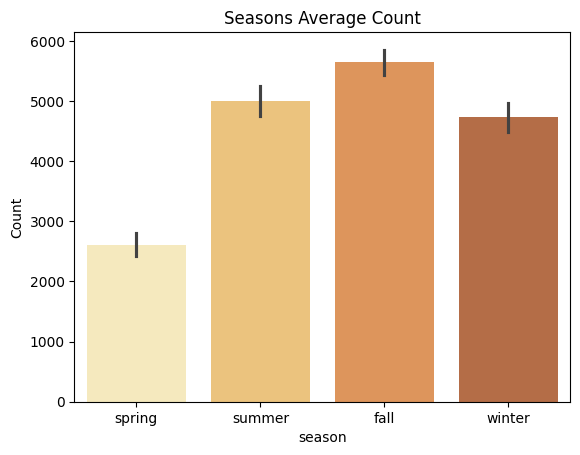

In [1017]:
#plt.figure(figsize=[10,4])
sns.barplot(x=Bike_df['season'],y=Bike_df['Count'],alpha=0.8,palette='YlOrBr')
plt.title('Seasons Average Count')
plt.show()

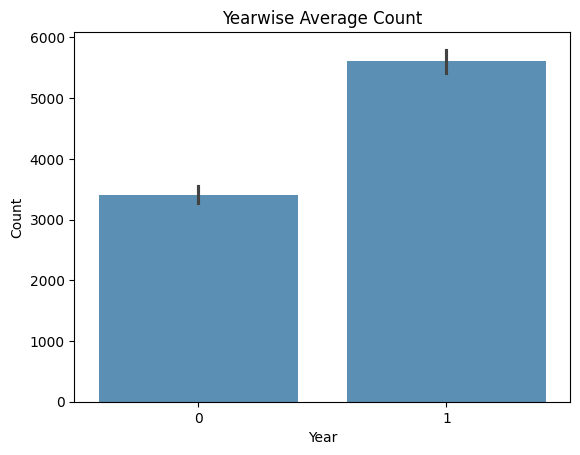

In [1018]:
sns.barplot(x=Bike_df['Year'],y=Bike_df['Count'],alpha=0.8)
plt.title('Yearwise Average Count')
plt.show()

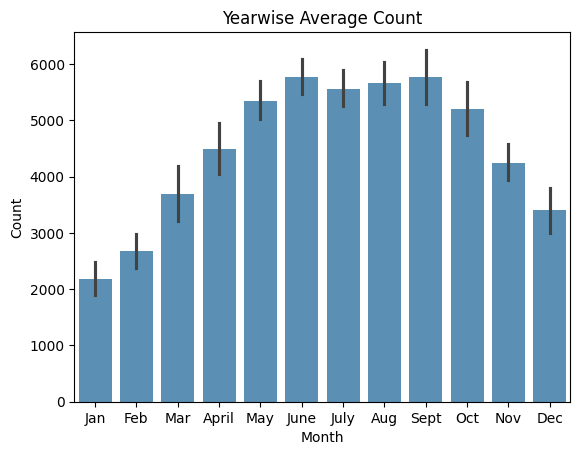

In [1019]:
sns.barplot(x=Bike_df['Month'],y=Bike_df['Count'],alpha=0.8)
plt.title('Yearwise Average Count')
plt.show()

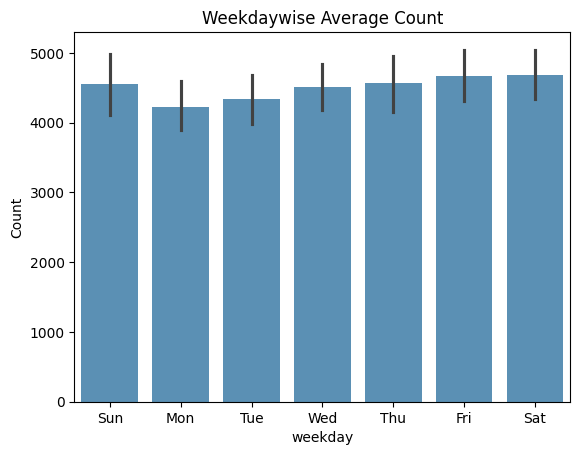

In [1020]:
sns.barplot(x=Bike_df['weekday'],y=Bike_df['Count'],alpha=0.8)
plt.title('Weekdaywise Average Count')
plt.show()

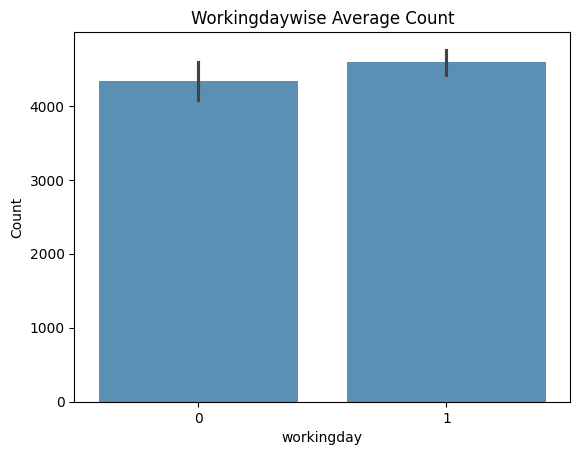

In [1021]:
sns.barplot(x=Bike_df['workingday'],y=Bike_df['Count'],alpha=0.8)
plt.title('Workingdaywise Average Count')
plt.show()

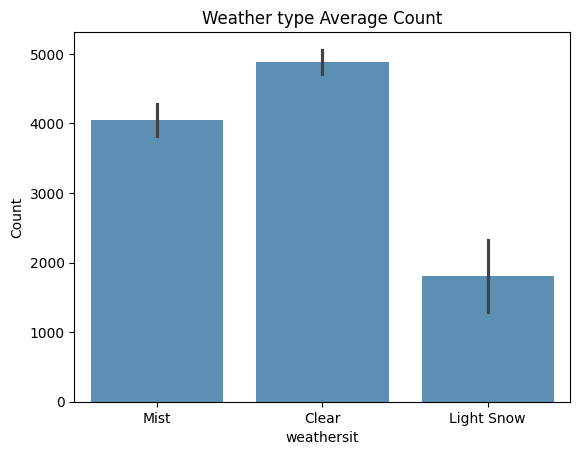

In [1022]:
sns.barplot(x=Bike_df['weathersit'],y=Bike_df['Count'],alpha=0.8)
plt.title('Weather type Average Count')
plt.show()

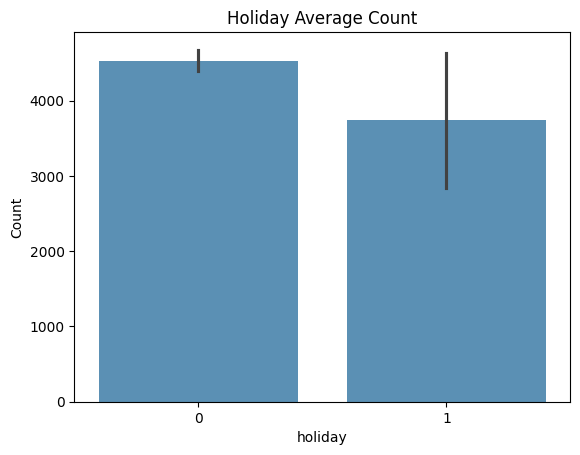

In [1023]:
sns.barplot(x=Bike_df['holiday'],y=Bike_df['Count'],alpha=0.8)
plt.title('Holiday Average Count')
plt.show()

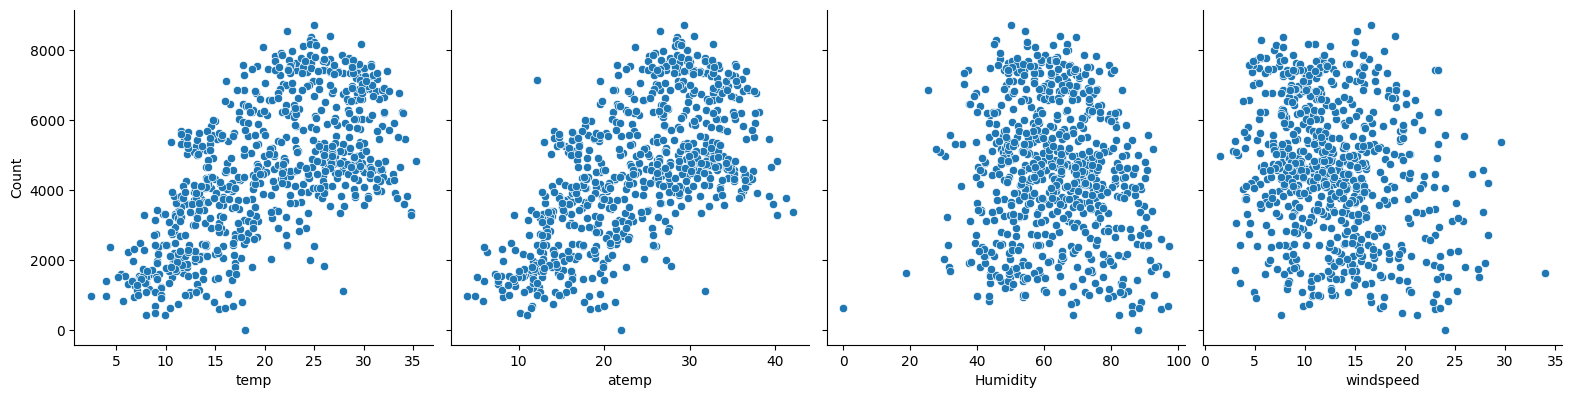

In [1024]:
sns.pairplot(Bike_df, x_vars=['temp','atemp','Humidity','windspeed'], y_vars='Count',size=4, aspect=1, kind='scatter', diag_kind = None)
plt.show()

<Axes: >

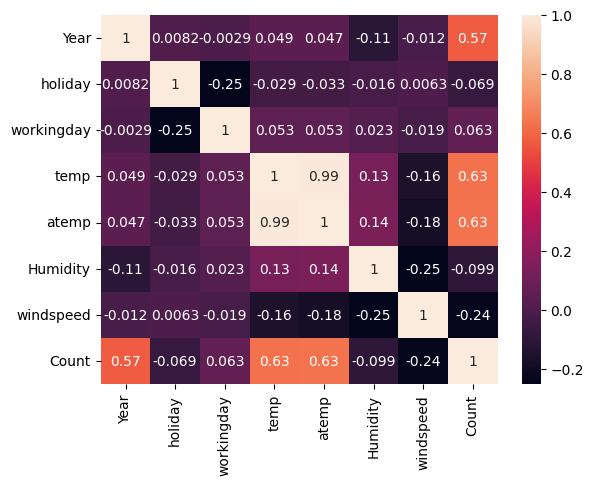

In [1025]:
sns.heatmap(Bike_df.corr(),annot=True)

temp,atemp having linear relation with Count from above scatter plot

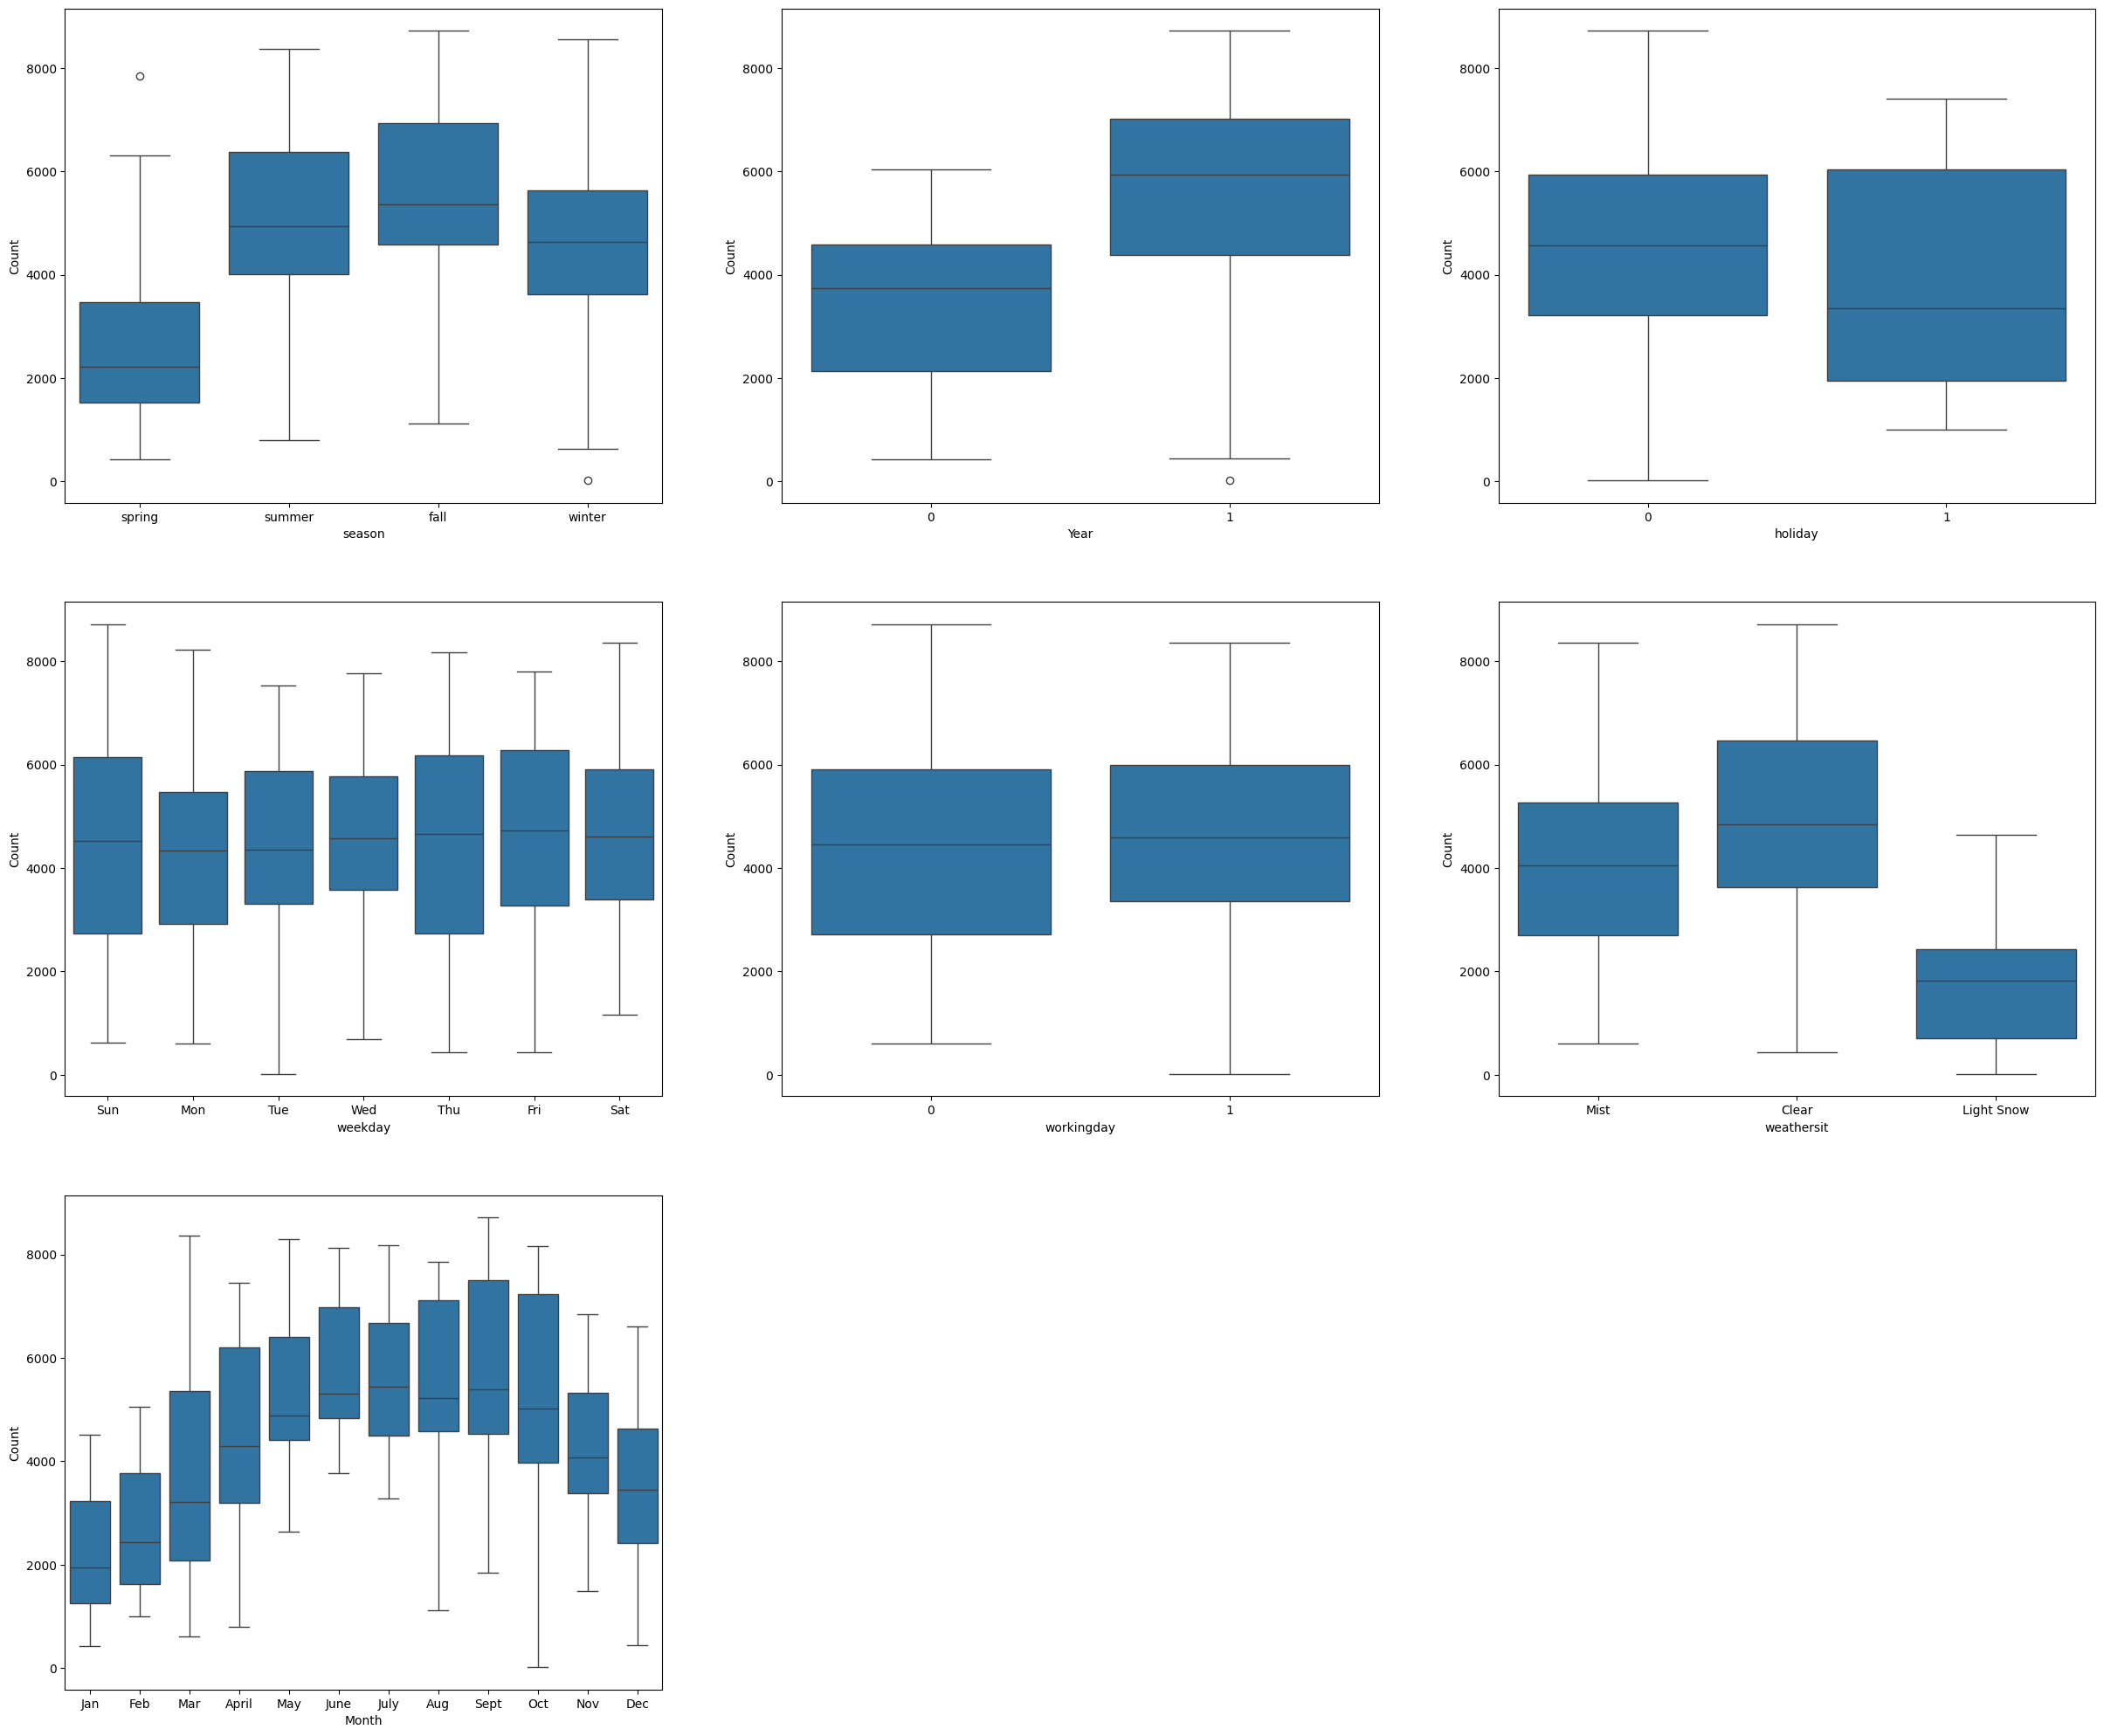

In [1026]:
plt.figure(figsize=(30,25))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'Count', data = Bike_df)
plt.subplot(3,3,2)
sns.boxplot(x = 'Year', y = 'Count', data = Bike_df)
plt.subplot(3,3,3)
sns.boxplot(x = 'holiday', y = 'Count', data = Bike_df)
plt.subplot(3,3,4)
sns.boxplot(x = 'weekday', y = 'Count', data = Bike_df)
plt.subplot(3,3,5)
sns.boxplot(x = 'workingday', y = 'Count', data = Bike_df)
plt.subplot(3,3,6)
sns.boxplot(x = 'weathersit', y = 'Count', data = Bike_df)
plt.subplot(3,3,7)
sns.boxplot(x = 'Month', y = 'Count', data = Bike_df)
plt.show()

Conslusions:
The graph clearly shows the qualitative distributions of the data


*   For the variable season, we can clearly see that the category Fall,has the highest median, which shows that the demand was high during this season and summer also has near to fall median. It is least for spring .
*   The year 2019 had a higher count of users as compared to the year 2018
The bike demand is almost constant throughout the week.

*   The count of total users is high during clear weather

*   The count is highest in the month of September
*   The count of users is less during the holidays

In [1027]:
# Get the dummy variables for the features ''season','mnth','weekday','weathersit'' and store it in a new variable - 'dummy'
dummy = Bike_df[['season','Month','weekday','weathersit']]

In [1028]:
dummy = pd.get_dummies(dummy,drop_first=True )
# Adding the dummy variables to the original dataset
Bike_df = pd.concat([Bike_df,dummy],axis = 1)
Bike_df.head()

,season,Year,Month,holiday,weekday,workingday,weathersit,temp,atemp,Humidity,...,Month_Oct,Month_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist
0,spring,0,Jan,0,Sun,0,Mist,14.110847,18.18125,80.5833,...,0,0,0,0,1,0,0,0,0,1
1,spring,0,Jan,0,Mon,0,Mist,14.902598,17.68695,69.6087,...,0,0,1,0,0,0,0,0,0,1
2,spring,0,Jan,0,Tue,1,Clear,8.050924,9.47025,43.7273,...,0,0,0,0,0,0,1,0,0,0
3,spring,0,Jan,0,Wed,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,0,1,0,0
4,spring,0,Jan,0,Thu,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,1,0,0,0,0


In [1029]:
Bike_df.columns

Index(['season', 'Year', 'Month', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'Humidity', 'windspeed', 'Count',
       'season_spring', 'season_summer', 'season_winter', 'Month_Aug',
       'Month_Dec', 'Month_Feb', 'Month_Jan', 'Month_July', 'Month_June',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sept',
       'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed', 'weathersit_Light Snow',
       'weathersit_Mist'],
      dtype='object')

In [1030]:
#Deleting the orginal columns season.weathersit,weekday,mnth
Bike_df.drop(['season'],axis=1,inplace=True)
Bike_df.drop(['weathersit'],axis=1,inplace=True)
Bike_df.drop(['weekday'],axis=1,inplace=True)
Bike_df.drop(['Month'],axis=1,inplace=True)

Bike_df.head()

,Year,holiday,workingday,temp,atemp,Humidity,windspeed,Count,season_spring,season_summer,...,Month_Oct,Month_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,0,1,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,1,0,0,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,0,0,0,0,1,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,1,0,0,0,0


In [1031]:
Bike_df.shape

(730, 30)

In [1032]:
Bike_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year                   730 non-null    int64  
 1   holiday                730 non-null    int64  
 2   workingday             730 non-null    int64  
 3   temp                   730 non-null    float64
 4   atemp                  730 non-null    float64
 5   Humidity               730 non-null    float64
 6   windspeed              730 non-null    float64
 7   Count                  730 non-null    int64  
 8   season_spring          730 non-null    uint8  
 9   season_summer          730 non-null    uint8  
 10  season_winter          730 non-null    uint8  
 11  Month_Aug              730 non-null    uint8  
 12  Month_Dec              730 non-null    uint8  
 13  Month_Feb              730 non-null    uint8  
 14  Month_Jan              730 non-null    uint8  
 15  Month_

## Train and test split

In [1033]:
import sklearn
from sklearn.model_selection import train_test_split
np.random.seed(0)
train, test = train_test_split(Bike_df, train_size = 0.7, random_state = 100)

In [1034]:
train.shape

(510, 30)

In [1035]:
train.columns

Index(['Year', 'holiday', 'workingday', 'temp', 'atemp', 'Humidity',
       'windspeed', 'Count', 'season_spring', 'season_summer', 'season_winter',
       'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jan', 'Month_July',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sept', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thu', 'weekday_Tue', 'weekday_Wed', 'weathersit_Light Snow',
       'weathersit_Mist'],
      dtype='object')

In [1036]:
test.shape

(220, 30)

In [1037]:
test.columns

Index(['Year', 'holiday', 'workingday', 'temp', 'atemp', 'Humidity',
       'windspeed', 'Count', 'season_spring', 'season_summer', 'season_winter',
       'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jan', 'Month_July',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sept', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thu', 'weekday_Tue', 'weekday_Wed', 'weathersit_Light Snow',
       'weathersit_Mist'],
      dtype='object')

## ReScaling features
Min-Max scaling

In [1038]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()

num_vars=['temp','atemp','Count','Humidity','windspeed']
#scaler.fit()
train[num_vars]=scaler.fit_transform(train[num_vars])
train.head()

,Year,holiday,workingday,temp,atemp,Humidity,windspeed,Count,season_spring,season_summer,...,Month_Oct,Month_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,...,0,0,0,0,1,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0.191095,0,1,...,0,0,0,1,0,0,0,0,0,1


## Training Model

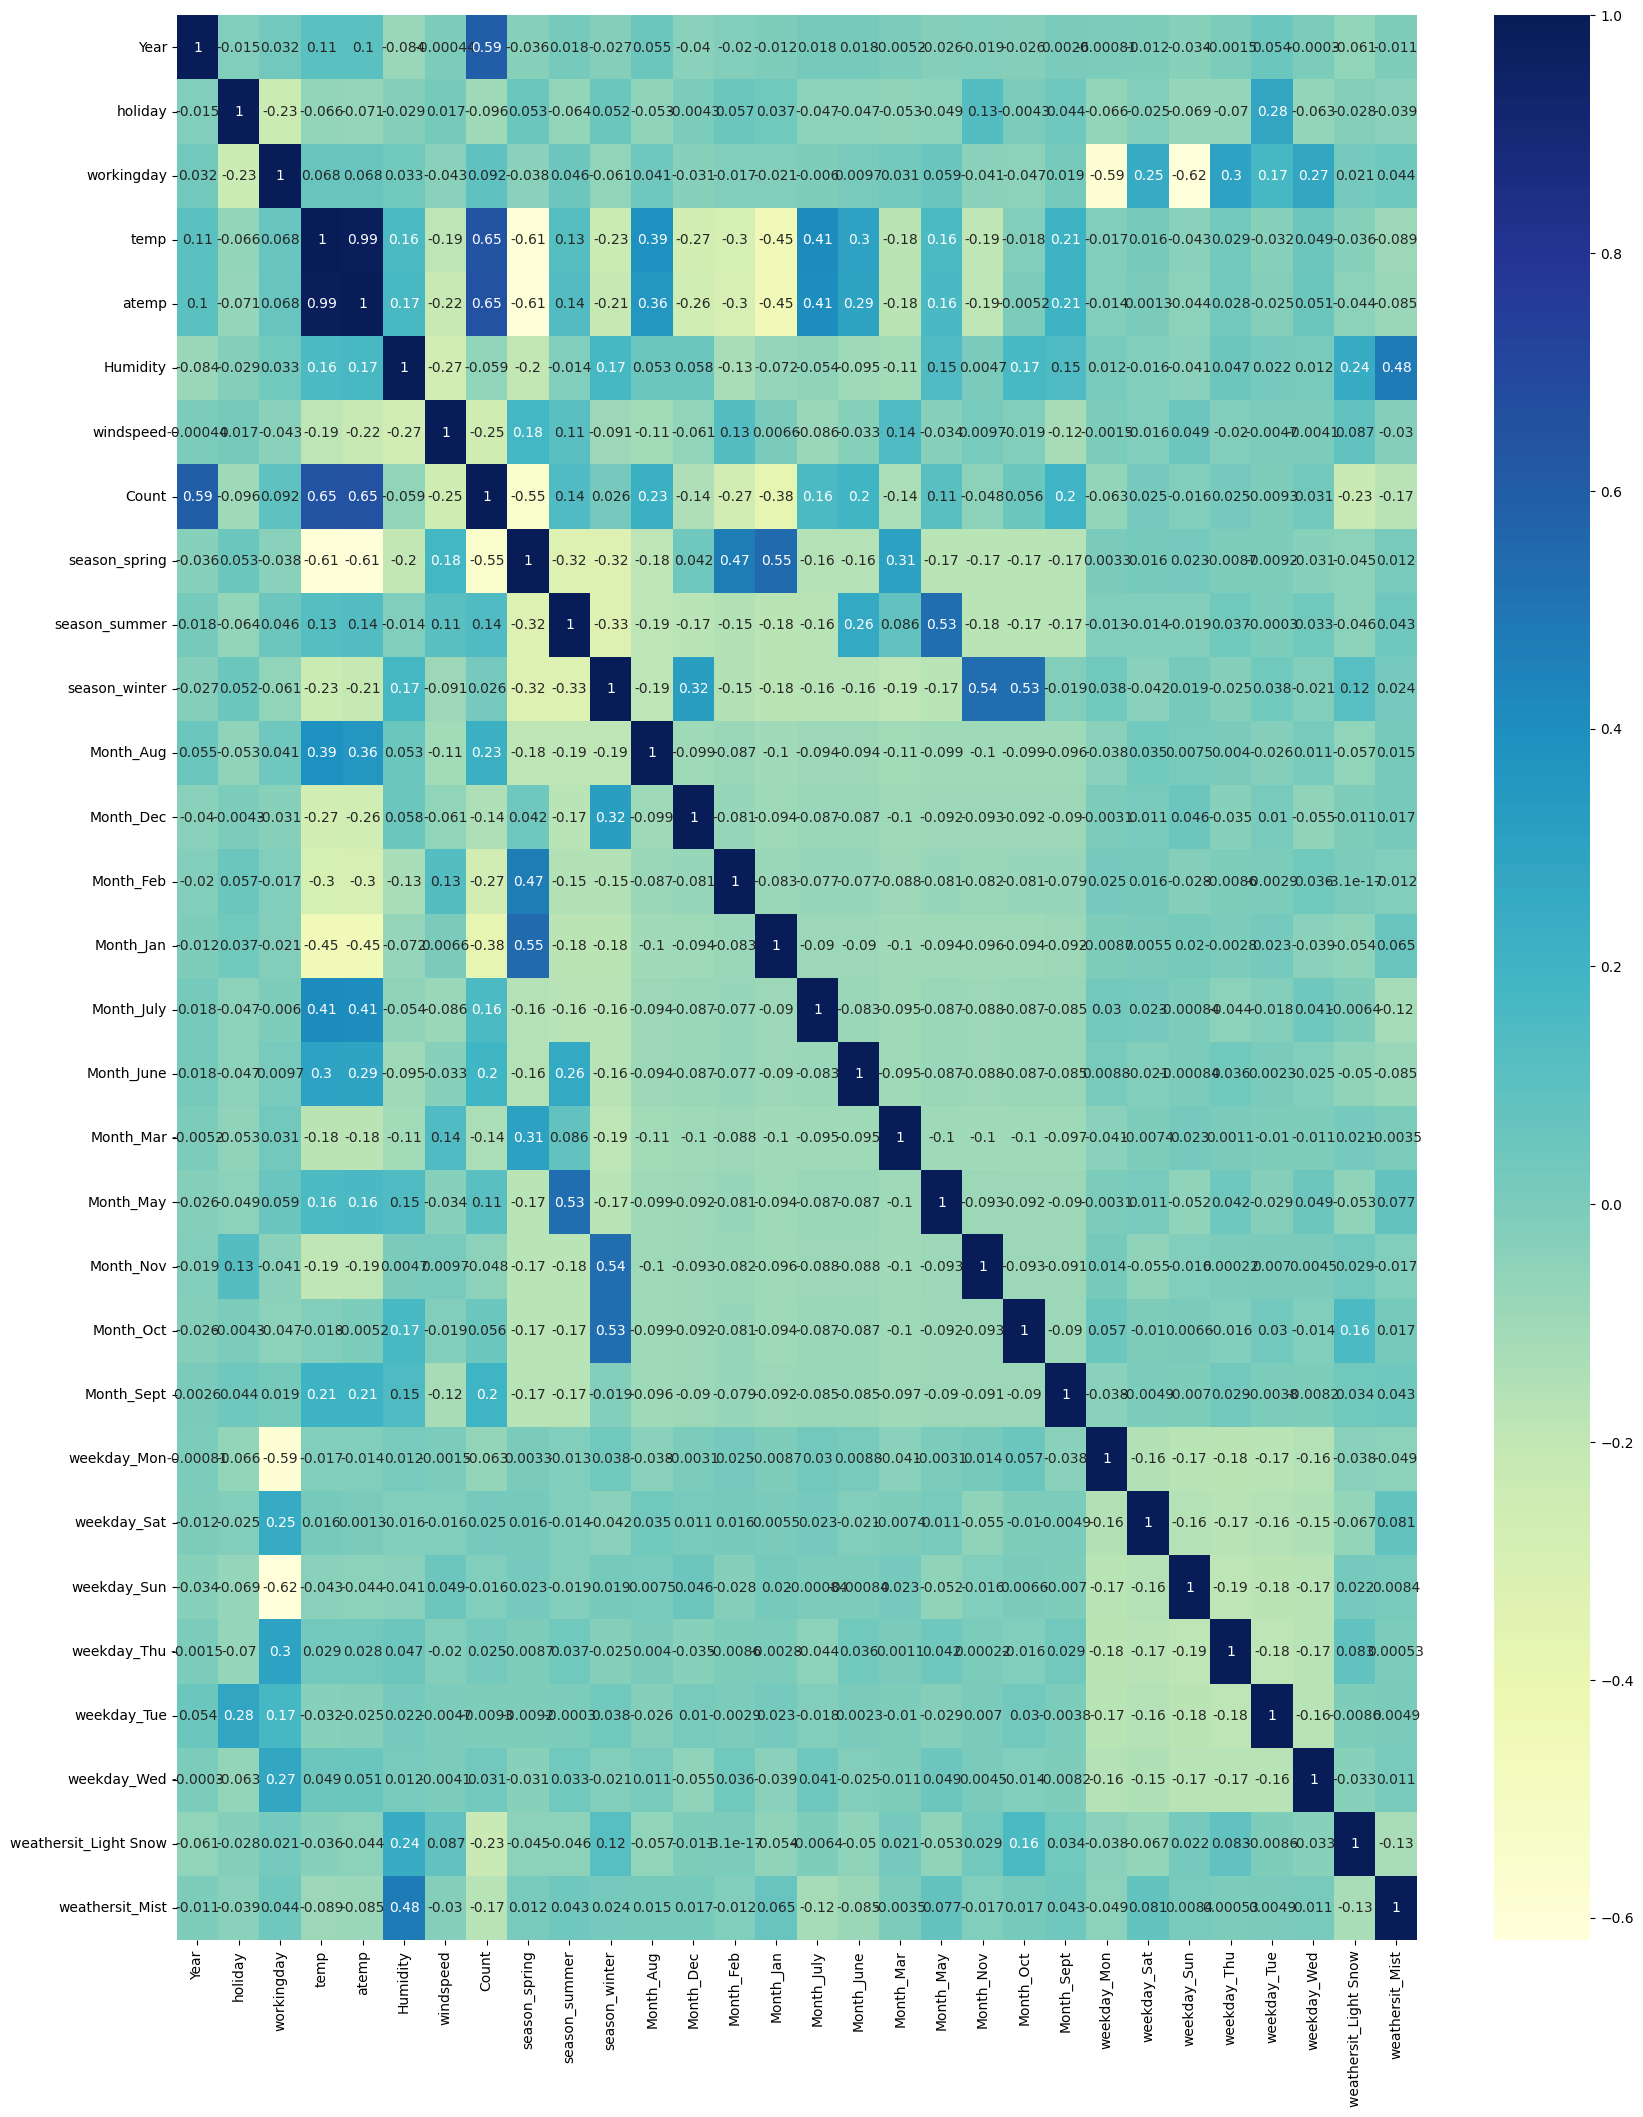

In [1039]:
#heatmap
plt.figure(figsize=(20, 25))
sns.heatmap(train.corr(), annot = True, cmap="YlGnBu")
plt.show()

temp,atemp has high correlation

In [1040]:
y_train=train.pop('Count')
X_train=train

In [1041]:
X_train.head()

,Year,holiday,workingday,temp,atemp,Humidity,windspeed,season_spring,season_summer,season_winter,...,Month_Oct,Month_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.498067,0.663106,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0,1,0,...,0,0,0,0,1,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.751824,0.380981,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [1042]:
y_train.head()

576    0.827658
426    0.465255
728    0.204096
482    0.482973
111    0.191095
Name: Count, dtype: float64

In [1043]:
import statsmodels.api as sm

In [1044]:
#add a constant

X_train_sm=sm.add_constant(X_train['temp'])

#create a first model
lr=sm.OLS(y_train,X_train_sm)

#fit
lr_model=lr.fit()

#params
lr_model.params

const    0.169031
temp     0.640944
dtype: float64

In [1045]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Wed, 13 Mar 2024   Prob (F-statistic):           2.46e-61
Time:                        17:15:02   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.000       0.130       0.208
temp           0.6409      0.034     19.026      0.000       0.575       0.707
==============================================================================
Omnibus:                        6.355   Durbin-Watson:                   2.069
Prob(Omnibus):                  0.042   Jarque-Bera (JB):                4.521
Skew:                           0.088   Prob(JB):                        0.104
Kurtosis:                       2.574   Cond. No.                         5.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1046]:
#add another variable atemp
#add a constant
X_train_sm=X_train[['temp','atemp']]
X_train_sm=sm.add_constant(X_train_sm)

#create  model
lr=sm.OLS(y_train,X_train_sm)

#fit
lr_model=lr.fit()

#params
lr_model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.421
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 13 Mar 2024   Prob (F-statistic):           8.38e-61
Time:                        17:15:02   Log-Likelihood:                 178.05
No. Observations:                 510   AIC:                            -350.1
Df Residuals:                     507   BIC:                            -337.4
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1627      0.020      8.198      0.000       0.124       0.202
temp           0.1853      0.233      0.796      0.426      -0.272       0.643
atemp          0.4896      0.248      1.977      0.049       0.003       0.976
==============================================================================
Omnibus:                        4.986   Durbin-Watson:                   2.094
Prob(Omnibus):                  0.083   Jarque-Bera (JB):                3.696
Skew:                           0.070   Prob(JB):                        0.158
Kurtosis:                       2.607   Cond. No.                         56.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

By adding atemp, p value of temp became 0.426 which is very high

## Adding all variables to model

In [1047]:
Bike_df.columns

Index(['Year', 'holiday', 'workingday', 'temp', 'atemp', 'Humidity',
       'windspeed', 'Count', 'season_spring', 'season_summer', 'season_winter',
       'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jan', 'Month_July',
       'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct',
       'Month_Sept', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thu', 'weekday_Tue', 'weekday_Wed', 'weathersit_Light Snow',
       'weathersit_Mist'],
      dtype='object')

In [1048]:
#build model with all variables
X_train_sm=sm.add_constant(X_train)

#create  model
lr=sm.OLS(y_train,X_train_sm)

#fit
lr_model=lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.37
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          2.81e-180
Time:                        17:15:02   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -996.2
Df Residuals:                     481   BIC:                            -873.4
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2394      0.035      6.761      0.000       0.170       0.309
Year                      0.2325      0.008     28.794      0.000       0.217       0.248
holiday                   0.0051      0.024      0.210      0.833      -0.042       0.052
workingday                0.0904      0.012      7.292      0.000       0.066       0.115
temp                      0.3880      0.142      2.727      0.007       0.108       0.668
atemp                     0.0590      0.138      0.426      0.670      -0.213       0.331
Humidity                 -0.1520      0.039     -3.938      0.000      -0.228      -0.076
windspeed                -0.1836      0.026     -6.962      0.000      -0.235      -0.132
season_spring            -0.0454      0.030     -1.511      0.131      -0.104       0.014
season_summer             0.0424      0.026      1.617      0.107      -0.009       0.094
season_winter             0.1071      0.028      3.826      0.000       0.052       0.162
Month_Aug                 0.0223      0.034      0.657      0.511      -0.044       0.089
Month_Dec                -0.0443      0.034     -1.316      0.189      -0.110       0.022
Month_Feb                -0.0323      0.033     -0.980      0.327      -0.097       0.032
Month_Jan                -0.0631      0.034     -1.876      0.061      -0.129       0.003
Month_July               -0.0327      0.035     -0.931      0.352      -0.102       0.036
Month_June                0.0060      0.025      0.241      0.810      -0.043       0.055
Month_Mar                 0.0016      0.025      0.063      0.950      -0.047       0.050
Month_May                 0.0255      0.021      1.208      0.228      -0.016       0.067
Month_Nov                -0.0398      0.036     -1.093      0.275      -0.111       0.032
Month_Oct                 0.0077      0.036      0.215      0.830      -0.063       0.078
Month_Sept                0.0868      0.032      2.711      0.007       0.024       0.150
weekday_Mon               0.0448      0.014      3.239      0.001       0.018       0.072
weekday_Sat               0.0097      0.016      0.623      0.534      -0.021       0.040
weekday_Sun               0.0991      0.014      7.274      0.000       0.072       0.126
weekday_Thu               0.0038      0.015      0.261      0.794      -0.025       0.033
weekday_Tue              -0.0119      0.015     -0.785      0.433      -0.042       0.018
weekday_Wed              -0.0087      0.015     -0.564      0.573      -0.039       0.022
weathersit_Light Snow    -0.2550      0.026     -9.631      0.000      -0.307      -0.203
weathersit_Mist          -0.0595      0.010     -5.701      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       84.

## Checking VIF

In [1049]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1050]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,86.43
3,temp,66.90
4,atemp,56.03
23,weekday_Sun,19.71
21,weekday_Mon,18.34
7,season_spring,10.77
9,season_winter,9.46
8,season_summer,8.29
18,Month_Nov,6.79
10,Month_Aug,6.47


In [1051]:
X=X_train.drop('Month_Mar',axis=1)

In [1052]:
#create model

X_train_sm=sm.add_constant(X)

#create  model
lr=sm.OLS(y_train,X_train_sm)

#fit
lr_model=lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.3
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          2.75e-181
Time:                        17:15:03   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -998.2
Df Residuals:                     482   BIC:                            -879.7
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2402      0.033      7.265      0.000       0.175       0.305
Year                      0.2325      0.008     28.824      0.000       0.217       0.248
holiday                   0.0053      0.024      0.221      0.825      -0.042       0.052
workingday                0.0907      0.012      7.660      0.000       0.067       0.114
temp                      0.3877      0.142      2.729      0.007       0.109       0.667
atemp                     0.0588      0.138      0.425      0.671      -0.213       0.330
Humidity                 -0.1518      0.038     -3.950      0.000      -0.227      -0.076
windspeed                -0.1837      0.026     -6.983      0.000      -0.235      -0.132
season_spring            -0.0447      0.028     -1.575      0.116      -0.101       0.011
season_summer             0.0421      0.026      1.637      0.102      -0.008       0.093
season_winter             0.1074      0.027      3.910      0.000       0.053       0.161
Month_Aug                 0.0216      0.032      0.676      0.499      -0.041       0.084
Month_Dec                -0.0456      0.026     -1.755      0.080      -0.097       0.005
Month_Feb                -0.0338      0.022     -1.517      0.130      -0.078       0.010
Month_Jan                -0.0646      0.022     -2.892      0.004      -0.109      -0.021
Month_July               -0.0333      0.033     -0.999      0.318      -0.099       0.032
Month_June                0.0055      0.024      0.233      0.816      -0.041       0.052
Month_May                 0.0251      0.020      1.268      0.205      -0.014       0.064
Month_Nov                -0.0410      0.031     -1.333      0.183      -0.102       0.019
Month_Oct                 0.0065      0.031      0.213      0.831      -0.054       0.067
Month_Sept                0.0859      0.029      2.961      0.003       0.029       0.143
weekday_Mon               0.0450      0.014      3.315      0.001       0.018       0.072
weekday_Sat               0.0097      0.016      0.622      0.535      -0.021       0.040
weekday_Sun               0.0993      0.013      7.501      0.000       0.073       0.125
weekday_Thu               0.0038      0.015      0.259      0.796      -0.025       0.033
weekday_Tue              -0.0119      0.015     -0.788      0.431      -0.042       0.018
weekday_Wed              -0.0087      0.015     -0.568      0.570      -0.039       0.022
weathersit_Light Snow    -0.2550      0.026     -9.641      0.000      -0.307      -0.203
weathersit_Mist          -0.0595      0.010     -5.708      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       84.449   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarqu

In [1053]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,workingday,74.82
3,temp,66.84
4,atemp,55.99
22,weekday_Sun,17.21
20,weekday_Mon,16.19
7,season_spring,9.66
9,season_winter,9.13
8,season_summer,7.99
10,Month_Aug,5.74
14,Month_July,5.11


In [1054]:
X=X.drop('holiday',axis=1)

In [1055]:
#create model

X_train_sm=sm.add_constant(X)

#create  model
lr=sm.OLS(y_train,X_train_sm)

#fit
lr_model=lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     103.3
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          2.75e-181
Time:                        17:15:03   Log-Likelihood:                 527.12
No. Observations:                 510   AIC:                            -998.2
Df Residuals:                     482   BIC:                            -879.7
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2455      0.050      4.931      0.000       0.148       0.343
Year                      0.2325      0.008     28.824      0.000       0.217       0.248
workingday                0.0854      0.027      3.201      0.001       0.033       0.138
temp                      0.3877      0.142      2.729      0.007       0.109       0.667
atemp                     0.0588      0.138      0.425      0.671      -0.213       0.330
Humidity                 -0.1518      0.038     -3.950      0.000      -0.227      -0.076
windspeed                -0.1837      0.026     -6.983      0.000      -0.235      -0.132
season_spring            -0.0447      0.028     -1.575      0.116      -0.101       0.011
season_summer             0.0421      0.026      1.637      0.102      -0.008       0.093
season_winter             0.1074      0.027      3.910      0.000       0.053       0.161
Month_Aug                 0.0216      0.032      0.676      0.499      -0.041       0.084
Month_Dec                -0.0456      0.026     -1.755      0.080      -0.097       0.005
Month_Feb                -0.0338      0.022     -1.517      0.130      -0.078       0.010
Month_Jan                -0.0646      0.022     -2.892      0.004      -0.109      -0.021
Month_July               -0.0333      0.033     -0.999      0.318      -0.099       0.032
Month_June                0.0055      0.024      0.233      0.816      -0.041       0.052
Month_May                 0.0251      0.020      1.268      0.205      -0.014       0.064
Month_Nov                -0.0410      0.031     -1.333      0.183      -0.102       0.019
Month_Oct                 0.0065      0.031      0.213      0.831      -0.054       0.067
Month_Sept                0.0859      0.029      2.961      0.003       0.029       0.143
weekday_Mon               0.0398      0.030      1.323      0.186      -0.019       0.099
weekday_Sat               0.0097      0.016      0.622      0.535      -0.021       0.040
weekday_Sun               0.0940      0.030      3.138      0.002       0.035       0.153
weekday_Thu               0.0038      0.015      0.259      0.796      -0.025       0.033
weekday_Tue              -0.0119      0.015     -0.788      0.431      -0.042       0.018
weekday_Wed              -0.0087      0.015     -0.568      0.570      -0.039       0.022
weathersit_Light Snow    -0.2550      0.026     -9.641      0.000      -0.307      -0.203
weathersit_Mist          -0.0595      0.010     -5.708      0.000      -0.080      -0.039
==============================================================================
Omnibus:                       84.449   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              234.878
Skew:                          -0.804   Prob(JB):       

In [1056]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,434.60
3,atemp,383.07
4,Humidity,38.42
1,workingday,21.48
8,season_winter,11.30
6,season_spring,9.53
7,season_summer,7.94
21,weekday_Sun,6.22
9,Month_Aug,5.93
19,weekday_Mon,5.87


In [1057]:
X=X.drop(['Month_Oct','weekday_Thu','atemp','weekday_Sat','weekday_Wed','weekday_Tue','Month_Aug'],axis=1)

In [1058]:
#create model

X_train_sm=sm.add_constant(X)

#create  model
lr=sm.OLS(y_train,X_train_sm)

#fit
lr_model=lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     140.3
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          6.17e-188
Time:                        17:15:03   Log-Likelihood:                 525.43
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     489   BIC:                            -919.9
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2458      0.046      5.353      0.000       0.156       0.336
Year                      0.2316      0.008     28.938      0.000       0.216       0.247
workingday                0.0936      0.025      3.684      0.000       0.044       0.143
temp                      0.4576      0.042     10.833      0.000       0.375       0.541
Humidity                 -0.1552      0.038     -4.090      0.000      -0.230      -0.081
windspeed                -0.1878      0.026     -7.362      0.000      -0.238      -0.138
season_spring            -0.0546      0.022     -2.474      0.014      -0.098      -0.011
season_summer             0.0312      0.018      1.738      0.083      -0.004       0.066
season_winter             0.1004      0.018      5.618      0.000       0.065       0.136
Month_Dec                -0.0480      0.018     -2.618      0.009      -0.084      -0.012
Month_Feb                -0.0341      0.022     -1.581      0.114      -0.076       0.008
Month_Jan                -0.0640      0.022     -2.965      0.003      -0.106      -0.022
Month_July               -0.0525      0.019     -2.807      0.005      -0.089      -0.016
Month_June               -0.0051      0.018     -0.279      0.781      -0.041       0.031
Month_May                 0.0209      0.019      1.123      0.262      -0.016       0.058
Month_Nov                -0.0455      0.019     -2.408      0.016      -0.083      -0.008
Month_Sept                0.0717      0.017      4.277      0.000       0.039       0.105
weekday_Mon               0.0496      0.027      1.838      0.067      -0.003       0.103
weekday_Sun               0.1039      0.027      3.869      0.000       0.051       0.157
weathersit_Light Snow    -0.2546      0.026     -9.745      0.000      -0.306      -0.203
weathersit_Mist          -0.0582      0.010     -5.641      0.000      -0.079      -0.038
==============================================================================
Omnibus:                       82.291   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              229.307
Skew:                          -0.783   Prob(JB):                     1.61e-50
Kurtosis:                       5.887   Cond. No.                         28.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1059]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Humidity,36.38
2,temp,27.07
1,workingday,19.18
5,season_spring,6.08
4,windspeed,5.15
17,weekday_Sun,5.12
16,weekday_Mon,4.89
7,season_winter,4.40
6,season_summer,4.08
10,Month_Jan,2.47


In [1060]:
X=X.drop(['Month_June','Month_May'],axis=1)

In [1061]:
#create model

X_train_sm=sm.add_constant(X)

#create  model
lr=sm.OLS(y_train,X_train_sm)

#fit
lr_model=lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.846
Method:                 Least Squares   F-statistic:                     155.9
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          9.80e-190
Time:                        17:15:03   Log-Likelihood:                 524.48
No. Observations:                 510   AIC:                            -1011.
Df Residuals:                     491   BIC:                            -930.5
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2368      0.045      5.315      0.000       0.149       0.324
Year                      0.2312      0.008     29.052      0.000       0.216       0.247
workingday                0.0942      0.025      3.713      0.000       0.044       0.144
temp                      0.4616      0.038     12.262      0.000       0.388       0.536
Humidity                 -0.1477      0.037     -3.958      0.000      -0.221      -0.074
windspeed                -0.1889      0.025     -7.441      0.000      -0.239      -0.139
season_spring            -0.0515      0.022     -2.373      0.018      -0.094      -0.009
season_summer             0.0393      0.015      2.586      0.010       0.009       0.069
season_winter             0.1021      0.018      5.752      0.000       0.067       0.137
Month_Dec                -0.0474      0.018     -2.619      0.009      -0.083      -0.012
Month_Feb                -0.0334      0.021     -1.562      0.119      -0.075       0.009
Month_Jan                -0.0634      0.021     -2.991      0.003      -0.105      -0.022
Month_July               -0.0515      0.018     -2.868      0.004      -0.087      -0.016
Month_Nov                -0.0444      0.019     -2.371      0.018      -0.081      -0.008
Month_Sept                0.0723      0.017      4.346      0.000       0.040       0.105
weekday_Mon               0.0500      0.027      1.855      0.064      -0.003       0.103
weekday_Sun               0.1040      0.027      3.875      0.000       0.051       0.157
weathersit_Light Snow    -0.2567      0.026     -9.849      0.000      -0.308      -0.206
weathersit_Mist          -0.0585      0.010     -5.668      0.000      -0.079      -0.038
==============================================================================
Omnibus:                       80.597   Durbin-Watson:                   2.050
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              213.714
Skew:                          -0.784   Prob(JB):                     3.91e-47
Kurtosis:                       5.757   Cond. No.                         27.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1062]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Humidity,34.64
2,temp,22.30
1,workingday,18.92
5,season_spring,6.05
15,weekday_Sun,5.04
4,windspeed,4.99
14,weekday_Mon,4.85
7,season_winter,4.40
6,season_summer,3.11
10,Month_Jan,2.42


In [1063]:
X=X.drop(['weekday_Mon','Month_Feb'],axis=1)

In [1064]:
#create model

X_train_sm=sm.add_constant(X)

#create  model
lr=sm.OLS(y_train,X_train_sm)

#fit
lr_model=lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     173.5
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          1.20e-190
Time:                        17:15:03   Log-Likelihood:                 521.29
No. Observations:                 510   AIC:                            -1009.
Df Residuals:                     493   BIC:                            -936.6
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2690      0.037      7.267      0.000       0.196       0.342
Year                      0.2311      0.008     28.929      0.000       0.215       0.247
workingday                0.0521      0.011      4.826      0.000       0.031       0.073
temp                      0.4744      0.037     12.978      0.000       0.403       0.546
Humidity                 -0.1480      0.037     -3.952      0.000      -0.222      -0.074
windspeed                -0.1883      0.025     -7.386      0.000      -0.238      -0.138
season_spring            -0.0624      0.021     -2.974      0.003      -0.104      -0.021
season_summer             0.0421      0.015      2.783      0.006       0.012       0.072
season_winter             0.1038      0.018      5.832      0.000       0.069       0.139
Month_Dec                -0.0398      0.017     -2.302      0.022      -0.074      -0.006
Month_Jan                -0.0465      0.018     -2.596      0.010      -0.082      -0.011
Month_July               -0.0514      0.018     -2.854      0.004      -0.087      -0.016
Month_Nov                -0.0441      0.018     -2.390      0.017      -0.080      -0.008
Month_Sept                0.0714      0.017      4.289      0.000       0.039       0.104
weekday_Sun               0.0625      0.014      4.493      0.000       0.035       0.090
weathersit_Light Snow    -0.2552      0.026     -9.754      0.000      -0.307      -0.204
weathersit_Mist          -0.0581      0.010     -5.607      0.000      -0.078      -0.038
==============================================================================
Omnibus:                       82.403   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              227.435
Skew:                          -0.787   Prob(JB):                     4.10e-50
Kurtosis:                       5.867   Cond. No.                         23.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1065]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Humidity,31.08
2,temp,18.94
1,workingday,4.77
4,windspeed,4.77
5,season_spring,4.50
7,season_winter,4.11
6,season_summer,2.88
15,weathersit_Mist,2.32
0,Year,2.09
13,weekday_Sun,1.86


##removing High VIF value feature Humidity

In [1066]:
X=X.drop('Humidity',axis=1)

In [1067]:
#create model

X_train_sm=sm.add_constant(X)

#create  model
lr=sm.OLS(y_train,X_train_sm)

#fit
lr_model=lr.fit()

#params
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     178.7
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          1.84e-188
Time:                        17:15:04   Log-Likelihood:                 513.34
No. Observations:                 510   AIC:                            -994.7
Df Residuals:                     494   BIC:                            -926.9
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1985      0.033      6.031      0.000       0.134       0.263
Year                      0.2348      0.008     29.173      0.000       0.219       0.251
workingday                0.0547      0.011      5.009      0.000       0.033       0.076
temp                      0.4354      0.036     12.191      0.000       0.365       0.506
windspeed                -0.1609      0.025     -6.464      0.000      -0.210      -0.112
season_spring            -0.0713      0.021     -3.371      0.001      -0.113      -0.030
season_summer             0.0354      0.015      2.320      0.021       0.005       0.065
season_winter             0.0903      0.018      5.093      0.000       0.055       0.125
Month_Dec                -0.0467      0.017     -2.675      0.008      -0.081      -0.012
Month_Jan                -0.0526      0.018     -2.905      0.004      -0.088      -0.017
Month_July               -0.0466      0.018     -2.554      0.011      -0.082      -0.011
Month_Nov                -0.0447      0.019     -2.389      0.017      -0.081      -0.008
Month_Sept                0.0652      0.017      3.880      0.000       0.032       0.098
weekday_Sun               0.0670      0.014      4.758      0.000       0.039       0.095
weathersit_Light Snow    -0.2969      0.024    -12.222      0.000      -0.345      -0.249
weathersit_Mist          -0.0818      0.009     -9.526      0.000      -0.099      -0.065
==============================================================================
Omnibus:                       85.035   Durbin-Watson:                   2.025
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              239.570
Skew:                          -0.805   Prob(JB):                     9.50e-53
Kurtosis:                       5.946   Cond. No.                         21.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1068]:
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.92
1,workingday,4.74
3,windspeed,4.71
4,season_spring,3.09
6,season_winter,3.03
5,season_summer,2.33
0,Year,2.08
12,weekday_Sun,1.86
10,Month_Nov,1.79
8,Month_Jan,1.67


eventhough temp has high VIF value but it has p-value 0, so keeping this feature without dropping

## Residual analysis

In [1069]:
y_train_pred=lr_model.predict(X_train_sm)


<Axes: ylabel='Density'>

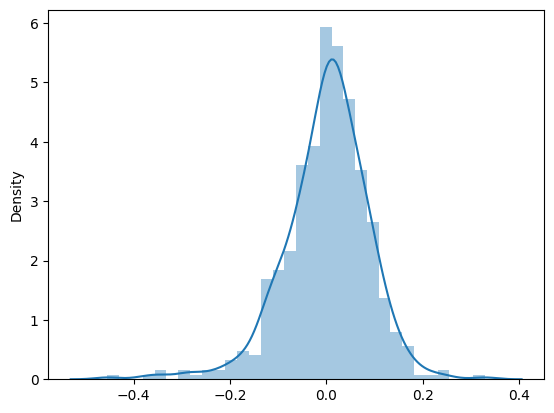

In [1070]:
res=y_train-y_train_pred
sns.distplot(res)

## predict and evaluate model

In [1071]:
num_vars=['temp','atemp','Count','Humidity','windspeed']
#scaler.fit()
test[num_vars]=scaler.fit_transform(test[num_vars])
test.head()

,Year,holiday,workingday,temp,atemp,Humidity,windspeed,Count,season_spring,season_summer,...,Month_Oct,Month_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist
184,0,1,0,0.837241,0.778767,0.534223,0.149393,0.704300,0,0,...,0,0,0,0,0,0,1,0,0,1
535,1,0,1,0.911423,0.855132,0.470417,0.231142,0.725421,0,1,...,0,0,0,0,0,1,0,0,0,0
299,0,0,1,0.496221,0.492359,0.777843,0.443398,0.278853,0,0,...,1,0,0,0,0,0,0,0,0,1
221,0,0,1,0.890387,0.805661,0.236659,0.449707,0.545512,0,0,...,0,0,0,0,0,1,0,0,0,0
152,0,0,1,0.821739,0.749249,0.070765,0.682387,0.569148,0,1,...,0,0,0,0,0,0,0,0,0,0


In [1072]:
test.describe()

,Year,holiday,workingday,temp,atemp,Humidity,windspeed,Count,season_spring,season_summer,...,Month_Oct,Month_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.546074,0.530791,0.508362,0.418803,0.517923,0.254545,0.263636,...,0.086364,0.086364,0.145455,0.177273,0.118182,0.100000,0.127273,0.168182,0.027273,0.318182
std,0.500809,0.187620,0.459303,0.248645,0.227648,0.200875,0.187683,0.239498,0.436599,0.441609,...,0.281541,0.281541,0.353363,0.382770,0.323559,0.300684,0.334038,0.374881,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.329310,0.333953,0.361079,0.284201,0.361045,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.545492,0.543153,0.491299,0.403318,0.520681,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.756414,0.719758,0.650989,0.523975,0.687956,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1073]:
y_test=test.pop('Count')
X_test=test

In [1074]:
#add a constant
X_test_sm=sm.add_constant(X_test)
X_test_sm.head()

,const,Year,holiday,workingday,temp,atemp,Humidity,windspeed,season_spring,season_summer,...,Month_Oct,Month_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist
184,1.0,0,1,0,0.837241,0.778767,0.534223,0.149393,0,0,...,0,0,0,0,0,0,1,0,0,1
535,1.0,1,0,1,0.911423,0.855132,0.470417,0.231142,0,1,...,0,0,0,0,0,1,0,0,0,0
299,1.0,0,0,1,0.496221,0.492359,0.777843,0.443398,0,0,...,1,0,0,0,0,0,0,0,0,1
221,1.0,0,0,1,0.890387,0.805661,0.236659,0.449707,0,0,...,0,0,0,0,0,1,0,0,0,0
152,1.0,0,0,1,0.821739,0.749249,0.070765,0.682387,0,1,...,0,0,0,0,0,0,0,0,0,0


In [1075]:
X_test_sm=X_test_sm.drop(['Month_Mar','holiday','Month_Oct','weekday_Thu','atemp','weekday_Sat','weekday_Wed','weekday_Tue','Month_Aug','weekday_Mon','Month_Feb','Humidity','Month_June','Month_May'],axis=1)

In [1076]:
y_test_pred=lr_model.predict(X_test_sm)

In [1077]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.8046001601942087

Text(0, 0.5, 'y_test_pred')

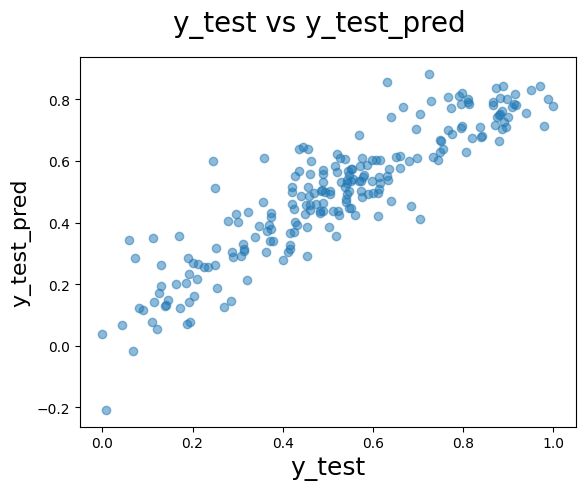

In [1078]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred, alpha=.5)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

# Using RFE method




In [1079]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [1080]:
#Running RFE with the output number of variables equal to 15
lm=LinearRegression()
lm.fit(X_train,y_train)

rfe=RFE(estimator=lm, n_features_to_select=15)
rfe=rfe.fit(X_train,y_train)

In [1081]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Year', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('Humidity', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('Month_Aug', False, 7),
 ('Month_Dec', False, 3),
 ('Month_Feb', False, 4),
 ('Month_Jan', True, 1),
 ('Month_July', True, 1),
 ('Month_June', False, 13),
 ('Month_Mar', False, 15),
 ('Month_May', False, 6),
 ('Month_Nov', False, 2),
 ('Month_Oct', False, 12),
 ('Month_Sept', True, 1),
 ('weekday_Mon', False, 8),
 ('weekday_Sat', False, 11),
 ('weekday_Sun', True, 1),
 ('weekday_Thu', False, 14),
 ('weekday_Tue', False, 9),
 ('weekday_Wed', False, 10),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist', True, 1)]

In [1082]:
col=X_train.columns[rfe.support_]
col

Index(['Year', 'holiday', 'workingday', 'temp', 'Humidity', 'windspeed',
       'season_spring', 'season_summer', 'season_winter', 'Month_Jan',
       'Month_July', 'Month_Sept', 'weekday_Sun', 'weathersit_Light Snow',
       'weathersit_Mist'],
      dtype='object')

In [1083]:
X_train.columns[~rfe.support_]

Index(['atemp', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_June',
       'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'weekday_Mon',
       'weekday_Sat', 'weekday_Thu', 'weekday_Tue', 'weekday_Wed'],
      dtype='object')

## Building model using stats model

In [1084]:
#creating X_test dataframe using RFE selected variables
X_train_rfe=X_train[col]

In [1085]:
#Adding constant
X_train_lm1=sm.add_constant(X_train_rfe)

In [1086]:
lm=sm.OLS(y_train,X_train_lm1).fit()
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.0
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          4.22e-191
Time:                        17:15:05   Log-Likelihood:                 519.65
No. Observations:                 510   AIC:                            -1007.
Df Residuals:                     494   BIC:                            -939.5
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.2519      0.036      6.969      0.000       0.181       0.323
Year                      0.2305      0.008     28.795      0.000       0.215       0.246
holiday                  -0.0582      0.027     -2.164      0.031      -0.111      -0.005
workingday                0.0433      0.012      3.762      0.000       0.021       0.066
temp                      0.5096      0.034     14.837      0.000       0.442       0.577
Humidity                 -0.1563      0.037     -4.188      0.000      -0.230      -0.083
windspeed                -0.1863      0.025     -7.310      0.000      -0.236      -0.136
season_spring            -0.0509      0.021     -2.464      0.014      -0.091      -0.010
season_summer             0.0508      0.015      3.423      0.001       0.022       0.080
season_winter             0.0933      0.017      5.403      0.000       0.059       0.127
Month_Jan                -0.0345      0.017     -1.989      0.047      -0.069      -0.000
Month_July               -0.0529      0.018     -2.931      0.004      -0.088      -0.017
Month_Sept                0.0814      0.016      4.945      0.000       0.049       0.114
weekday_Sun               0.0536      0.014      3.694      0.000       0.025       0.082
weathersit_Light Snow    -0.2475      0.026     -9.507      0.000      -0.299      -0.196
weathersit_Mist          -0.0563      0.010     -5.439      0.000      -0.077      -0.036
==============================================================================
Omnibus:                       66.260   Durbin-Watson:                   2.080
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.826
Skew:                          -0.678   Prob(JB):                     1.97e-35
Kurtosis:                       5.383   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1087]:
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,Humidity,29.37
3,temp,17.78
2,workingday,5.31
5,windspeed,4.73
6,season_spring,4.53
8,season_winter,3.46
7,season_summer,2.85
14,weathersit_Mist,2.29
0,Year,2.09
12,weekday_Sun,1.98


In [1088]:
X_train_rfe2=X_train_rfe.drop(['Humidity'],axis=1)

In [1089]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_rfe2)

# Create a first fitted model
lm2 = sm.OLS(y_train, X_train_lm2).fit()

lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     189.6
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          1.60e-188
Time:                        17:15:05   Log-Likelihood:                 510.75
No. Observations:                 510   AIC:                            -991.5
Df Residuals:                     495   BIC:                            -928.0
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1737      0.031      5.520      0.000       0.112       0.235
Year                      0.2345      0.008     29.009      0.000       0.219       0.250
holiday                  -0.0558      0.027     -2.042      0.042      -0.109      -0.002
workingday                0.0464      0.012      3.966      0.000       0.023       0.069
temp                      0.4722      0.034     14.005      0.000       0.406       0.538
windspeed                -0.1563      0.025     -6.286      0.000      -0.205      -0.107
season_spring            -0.0599      0.021     -2.867      0.004      -0.101      -0.019
season_summer             0.0445      0.015      2.967      0.003       0.015       0.074
season_winter             0.0784      0.017      4.562      0.000       0.045       0.112
Month_Jan                -0.0392      0.018     -2.227      0.026      -0.074      -0.005
Month_July               -0.0479      0.018     -2.614      0.009      -0.084      -0.012
Month_Sept                0.0755      0.017      4.527      0.000       0.043       0.108
weekday_Sun               0.0583      0.015      3.968      0.000       0.029       0.087
weathersit_Light Snow    -0.2908      0.024    -11.977      0.000      -0.339      -0.243
weathersit_Mist          -0.0813      0.009     -9.437      0.000      -0.098      -0.064
==============================================================================
Omnibus:                       67.830   Durbin-Watson:                   2.076
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              164.565
Skew:                          -0.692   Prob(JB):                     1.84e-36
Kurtosis:                       5.415   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1090]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,temp,7.07
2,workingday,5.24
4,windspeed,4.68
5,season_spring,3.07
6,season_summer,2.34
0,Year,2.08
7,season_winter,1.98
11,weekday_Sun,1.97
8,Month_Jan,1.62
9,Month_July,1.59


In [1091]:
X_train_rfe3=X_train_rfe2.drop(['holiday'],axis=1)

In [1092]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_rfe3)

# Create a first fitted model
lm3 = sm.OLS(y_train, X_train_lm3).fit()

lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.841
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     202.6
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          8.68e-189
Time:                        17:15:05   Log-Likelihood:                 508.61
No. Observations:                 510   AIC:                            -989.2
Df Residuals:                     496   BIC:                            -929.9
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1657      0.031      5.292      0.000       0.104       0.227
Year                      0.2346      0.008     28.941      0.000       0.219       0.251
workingday                0.0546      0.011      4.967      0.000       0.033       0.076
temp                      0.4724      0.034     13.966      0.000       0.406       0.539
windspeed                -0.1572      0.025     -6.306      0.000      -0.206      -0.108
season_spring            -0.0607      0.021     -2.899      0.004      -0.102      -0.020
season_summer             0.0448      0.015      2.980      0.003       0.015       0.074
season_winter             0.0775      0.017      4.499      0.000       0.044       0.111
Month_Jan                -0.0398      0.018     -2.252      0.025      -0.074      -0.005
Month_July               -0.0468      0.018     -2.549      0.011      -0.083      -0.011
Month_Sept                0.0736      0.017      4.406      0.000       0.041       0.106
weekday_Sun               0.0667      0.014      4.710      0.000       0.039       0.094
weathersit_Light Snow    -0.2896      0.024    -11.895      0.000      -0.337      -0.242
weathersit_Mist          -0.0807      0.009     -9.351      0.000      -0.098      -0.064
==============================================================================
Omnibus:                       73.767   Durbin-Watson:                   2.057
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              187.147
Skew:                          -0.734   Prob(JB):                     2.30e-41
Kurtosis:                       5.579   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1093]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
vif['Features'] = X_train_rfe3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe3.values, i) for i in range(X_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,6.82
1,workingday,4.68
3,windspeed,4.66
4,season_spring,2.99
5,season_summer,2.33
0,Year,2.08
6,season_winter,1.91
10,weekday_Sun,1.84
7,Month_Jan,1.62
8,Month_July,1.59


In [1094]:
X_train_rfe4=X_train_rfe3.drop(['Month_July'],axis=1)

In [1095]:
# Add a constant
X_train_lm4 = sm.add_constant(X_train_rfe4)

# Create a first fitted model
lm4 = sm.OLS(y_train, X_train_lm4).fit()

lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.836
Method:                 Least Squares   F-statistic:                     216.5
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          1.44e-188
Time:                        17:15:05   Log-Likelihood:                 505.29
No. Observations:                 510   AIC:                            -984.6
Df Residuals:                     497   BIC:                            -929.5
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.1582      0.031      5.046      0.000       0.097       0.220
Year                      0.2352      0.008     28.855      0.000       0.219       0.251
workingday                0.0555      0.011      5.025      0.000       0.034       0.077
temp                      0.4595      0.034     13.664      0.000       0.393       0.526
windspeed                -0.1576      0.025     -6.288      0.000      -0.207      -0.108
season_spring            -0.0498      0.021     -2.416      0.016      -0.090      -0.009
season_summer             0.0587      0.014      4.157      0.000       0.031       0.086
season_winter             0.0887      0.017      5.299      0.000       0.056       0.122
Month_Jan                -0.0417      0.018     -2.351      0.019      -0.077      -0.007
Month_Sept                0.0863      0.016      5.385      0.000       0.055       0.118
weekday_Sun               0.0670      0.014      4.707      0.000       0.039       0.095
weathersit_Light Snow    -0.2906      0.024    -11.870      0.000      -0.339      -0.243
weathersit_Mist          -0.0795      0.009     -9.170      0.000      -0.097      -0.062
==============================================================================
Omnibus:                       77.306   Durbin-Watson:                   2.086
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              191.164
Skew:                          -0.776   Prob(JB):                     3.08e-42
Kurtosis:                       5.566   Cond. No.                         20.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1096]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
vif['Features'] = X_train_rfe4.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe4.values, i) for i in range(X_train_rfe4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.53
1,workingday,4.68
3,windspeed,4.65
4,season_spring,2.87
0,Year,2.07
5,season_summer,2.00
9,weekday_Sun,1.84
6,season_winter,1.76
7,Month_Jan,1.61
11,weathersit_Mist,1.58


In [1097]:
X_train_rfe5=X_train_rfe4.drop(['weathersit_Light Snow'],axis=1)

In [1098]:
# Add a constant
X_train_lm5 = sm.add_constant(X_train_rfe5)

# Create a first fitted model
lm5 = sm.OLS(y_train, X_train_lm5).fit()

lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     174.4
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          6.97e-163
Time:                        17:15:05   Log-Likelihood:                 441.64
No. Observations:                 510   AIC:                            -859.3
Df Residuals:                     498   BIC:                            -808.5
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1503      0.035      4.236      0.000       0.081       0.220
Year                0.2406      0.009     26.130      0.000       0.223       0.259
workingday          0.0473      0.012      3.791      0.000       0.023       0.072
temp                0.4735      0.038     12.448      0.000       0.399       0.548
windspeed          -0.1864      0.028     -6.601      0.000      -0.242      -0.131
season_spring      -0.0425      0.023     -1.823      0.069      -0.088       0.003
season_summer       0.0629      0.016      3.938      0.000       0.031       0.094
season_winter       0.0799      0.019      4.219      0.000       0.043       0.117
Month_Jan          -0.0367      0.020     -1.831      0.068      -0.076       0.003
Month_Sept          0.0780      0.018      4.303      0.000       0.042       0.114
weekday_Sun         0.0586      0.016      3.642      0.000       0.027       0.090
weathersit_Mist    -0.0657      0.010     -6.759      0.000      -0.085      -0.047
==============================================================================
Omnibus:                      143.868   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              509.656
Skew:                          -1.268   Prob(JB):                    2.14e-111
Kurtosis:                       7.189   Cond. No.                         19.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1099]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
vif['Features'] = X_train_rfe5.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe5.values, i) for i in range(X_train_rfe5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.52
1,workingday,4.66
3,windspeed,4.60
4,season_spring,2.87
0,Year,2.07
5,season_summer,2.00
9,weekday_Sun,1.83
6,season_winter,1.74
7,Month_Jan,1.61
10,weathersit_Mist,1.55


In [1100]:
X_train_rfe6=X_train_rfe5.drop(['season_spring'],axis=1)

In [1101]:
# Add a constant
X_train_lm6 = sm.add_constant(X_train_rfe6)

# Create a first fitted model
lm6 = sm.OLS(y_train, X_train_lm6).fit()

lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.793
Model:                            OLS   Adj. R-squared:                  0.788
Method:                 Least Squares   F-statistic:                     190.6
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          2.56e-163
Time:                        17:15:05   Log-Likelihood:                 439.95
No. Observations:                 510   AIC:                            -857.9
Df Residuals:                     499   BIC:                            -811.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.1024      0.024      4.286      0.000       0.055       0.149
Year                0.2397      0.009     26.009      0.000       0.222       0.258
workingday          0.0479      0.013      3.826      0.000       0.023       0.072
temp                0.5247      0.026     20.426      0.000       0.474       0.575
windspeed          -0.1910      0.028     -6.774      0.000      -0.246      -0.136
season_summer       0.0822      0.012      6.864      0.000       0.059       0.106
season_winter       0.1057      0.013      8.366      0.000       0.081       0.130
Month_Jan          -0.0410      0.020     -2.051      0.041      -0.080      -0.002
Month_Sept          0.0856      0.018      4.843      0.000       0.051       0.120
weekday_Sun         0.0593      0.016      3.677      0.000       0.028       0.091
weathersit_Mist    -0.0654      0.010     -6.714      0.000      -0.085      -0.046
==============================================================================
Omnibus:                      137.518   Durbin-Watson:                   2.071
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              459.164
Skew:                          -1.231   Prob(JB):                    1.97e-100
Kurtosis:                       6.943   Cond. No.                         13.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1102]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
vif['Features'] = X_train_rfe6.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe6.values, i) for i in range(X_train_rfe6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,5.09
1,workingday,4.27
3,windspeed,3.53
0,Year,2.04
8,weekday_Sun,1.74
4,season_summer,1.64
9,weathersit_Mist,1.53
5,season_winter,1.45
6,Month_Jan,1.29
7,Month_Sept,1.20


In [1103]:
X_train_rfe7=X_train_rfe6.drop(['Month_Jan'],axis=1)

In [1104]:
# Add a constant
X_train_lm7 = sm.add_constant(X_train_rfe7)

# Create a first fitted model
lm7 = sm.OLS(y_train, X_train_lm7).fit()

lm7.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Count   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.787
Method:                 Least Squares   F-statistic:                     210.0
Date:                Wed, 13 Mar 2024   Prob (F-statistic):          1.38e-163
Time:                        17:15:06   Log-Likelihood:                 437.81
No. Observations:                 510   AIC:                            -855.6
Df Residuals:                     500   BIC:                            -813.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0786      0.021      3.751      0.000       0.037       0.120
Year                0.2388      0.009     25.858      0.000       0.221       0.257
workingday          0.0479      0.013      3.818      0.000       0.023       0.073
temp                0.5514      0.022     24.814      0.000       0.508       0.595
windspeed          -0.1838      0.028     -6.550      0.000      -0.239      -0.129
season_summer       0.0886      0.012      7.646      0.000       0.066       0.111
season_winter       0.1161      0.012     10.019      0.000       0.093       0.139
Month_Sept          0.0876      0.018      4.948      0.000       0.053       0.122
weekday_Sun         0.0591      0.016      3.655      0.000       0.027       0.091
weathersit_Mist    -0.0663      0.010     -6.794      0.000      -0.086      -0.047
==============================================================================
Omnibus:                      136.515   Durbin-Watson:                   2.067
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              452.216
Skew:                          -1.225   Prob(JB):                     6.35e-99
Kurtosis:                       6.909   Cond. No.                         11.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [1105]:
# Calculate the VIFs for the new model again
vif = pd.DataFrame()
vif['Features'] = X_train_rfe7.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe7.values, i) for i in range(X_train_rfe7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,4.76
1,workingday,4.02
3,windspeed,3.40
0,Year,2.01
7,weekday_Sun,1.68
4,season_summer,1.57
8,weathersit_Mist,1.50
5,season_winter,1.38
6,Month_Sept,1.20


## Residual Analysis of the train data

In [1106]:
y_train_cnt = lm7.predict(X_train_lm7)

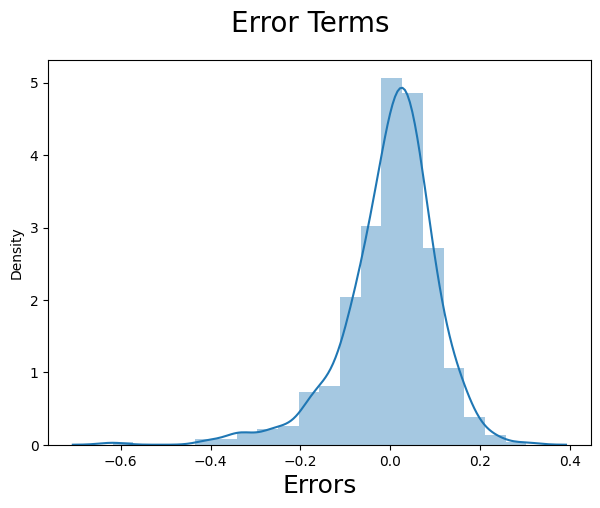

In [1107]:
# residual calculations
res = y_train - y_train_cnt

# Plot the histogram of the error terms

fig = plt.figure(figsize=[7,5])
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)        # Plot heading
plt.xlabel('Errors', fontsize = 18)
plt.show()


INSIGHT: - From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

Check for Homoscedasticity

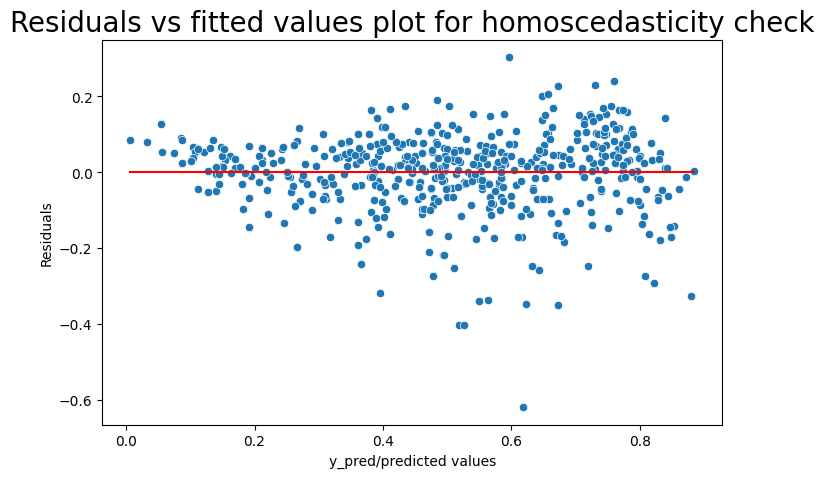

In [1108]:
# Check for Homoscedasticity
plt.figure(figsize = [8,5])
p = sns.scatterplot(x=y_train_cnt, y=res)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')

p = sns.lineplot(x=[min(y_train_cnt), max(y_train_cnt)], y=[0, 0], color='red')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check', fontsize = 20)

INSIGHT: - From the above plot, we can see that residuals have equal or almost equal variance across the regression line.

## MAKING PREDICTION USING FINAL MODEL

In [1109]:
test.describe()

,Year,holiday,workingday,temp,atemp,Humidity,windspeed,season_spring,season_summer,season_winter,...,Month_Oct,Month_Sept,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.546074,0.530791,0.508362,0.418803,0.254545,0.263636,0.236364,...,0.086364,0.086364,0.145455,0.177273,0.118182,0.100000,0.127273,0.168182,0.027273,0.318182
std,0.500809,0.187620,0.459303,0.248645,0.227648,0.200875,0.187683,0.436599,0.441609,0.425817,...,0.281541,0.281541,0.353363,0.382770,0.323559,0.300684,0.334038,0.374881,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.329310,0.333953,0.361079,0.284201,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.545492,0.543153,0.491299,0.403318,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.756414,0.719758,0.650989,0.523975,1.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [1110]:
X_test.shape

(220, 29)

In [1111]:
y_test.shape

(220,)

In [1112]:
#Selecting the variables that were part of final model (Model 7).
col_test = X_train_rfe7.columns

X_test = X_test[col_test]

# Adding constant variable to test dataframe
X_test_lm8 = sm.add_constant(X_test)

X_test_lm8.head()

,const,Year,workingday,temp,windspeed,season_summer,season_winter,Month_Sept,weekday_Sun,weathersit_Mist
184,1.0,0,0,0.837241,0.149393,0,0,0,0,1
535,1.0,1,1,0.911423,0.231142,1,0,0,0,0
299,1.0,0,1,0.496221,0.443398,0,1,0,0,1
221,1.0,0,1,0.890387,0.449707,0,0,0,0,0
152,1.0,0,1,0.821739,0.682387,1,0,0,0,0


In [1113]:
# Making predictions using the final model (lr8)

y_test_pred = lm7.predict(X_test_lm8)

Text(0, 0.5, 'y_test_pred')

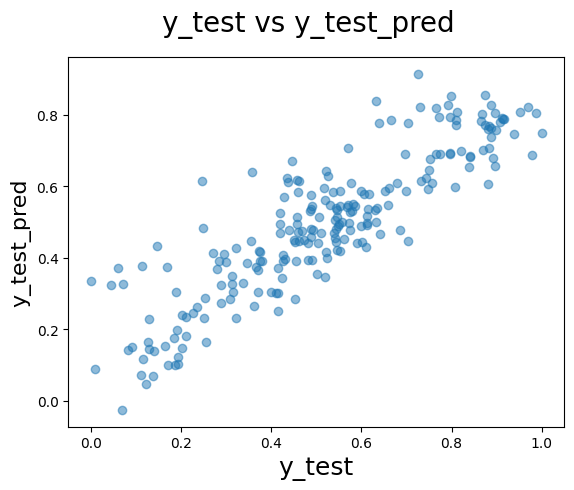

In [1114]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred, alpha=.5)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)

We can see there is linear relationship between y_test and y_test_pred

## Residual analysis

In [1115]:
from sklearn.metrics import r2_score

r2_test = r2_score(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_cnt)

print('Test data r^2 :',round((r2_test*100),2))
print('Train data r^2 :',round((r2_train*100),2))

Test data r^2 : 75.49
Train data r^2 : 79.08


## Adjusted R^2 Value for TEST

In [1116]:
# n for test data ,n1 for train data is number of rows
n = X_test.shape[0]
n1 = X_train_rfe7.shape[0]

# Number of features (predictors, p for test data, p1 for train data) is the number of columns
p = X_test.shape[1]
p1 = X_train_rfe7.shape[1]


# We find the Adjusted R-squared using the formula

adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
adjusted_r2_train = 1-(1-r2_train)*(n1-1)/(n1-p1-1)

print('Test data adjusted r^2 :',round((adjusted_r2_test*100),2))
print('Train data adjusted r^2 :',round((adjusted_r2_train*100),2))

Test data adjusted r^2 : 74.44
Train data adjusted r^2 : 78.7


As per our final Model, the below predictor variables influences bike bookings :

*   Temperature (temp)
*   Workingday
*   Windspeed
*   year
*   Weekday Sunday
*   summer season
*   weathersit_Mist
*   winter season
*   september month















